In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [58]:
nba_player_data = pd.read_csv('nba_player_data_2020.csv')

In [59]:
nba_player_data['ft'] = nba_player_data['Ht'].str[:1].astype(int)

In [60]:
nba_player_data['in'] = nba_player_data['Ht'].str[-1:].astype(int)

In [61]:
nba_player_data['height_in_inches'] = (nba_player_data['ft']*12)+nba_player_data['in']

nba_player_data['height_in_inches'] = (nba_player_data['ft']*12)+nba_player_data['in']

In [27]:
kmeans_data = nba_player_data[["height_in_inches", "Wt"]]

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(kmeans_data)

KMeans(n_clusters=3)

In [36]:
labels = kmeans.predict(kmeans_data)
centroids = kmeans.cluster_centers_

[2 0 0 1 2 2 2 0 0 1 0 0 0 0 2 1 0 1 0 1 0 0 1 2 1 0 2 1 1 0 2 0 0 2 0 2 2
 0 2 0 2 0 1 0 0 1 0 2 2 1 2 1 1 0 0 1 2 2 0 2 1 0 1 0 0 0 1 0 0 2 1 2 1 0
 0 1 2 2 0 2 0 1 0 2 0 0 1 2 2 1 2 1 1 2 0 2 0 0 0 0 1 0 2 0 0 0 1 2 0 0 0
 0 2 1 1 0 0 1 1 2 0 1 2 0 0 0 2 2 0 1 1 2 1 0 0 0 0 0 1 1 0 1 1 0 2 1 2 0
 0 2 0 0 0 1 0 0 1 1 0 0 0 2 2 2 2 1 0 1 1 0 0 0 0 0 1 0 2 1 1 0 2 2 2 1 0
 2 0 2 1 1 0 2 0 2 0 2 1 0 0 1 0 0 0 0 0 0 2 1 1 0 0 0 1 0 1 0 0 2 0 0 1 1
 0 1 2 0 1 0 0 1 2 2 0 2 1 1 0 2 1 2 2 1 0 1 2 1 2 2 1 0 0 2 0 2 1 0 1 0 2
 0 2 2 1 2 0 1 1 2 1 2 0 2 0 1 2 2 1 2 0 2 0 0 1 1 0 0 0 0 0 0 2 0 2 1 0 2
 0 1 0 0 0 2 0 2 0 0 2 1 2 2 1 0 1 0 1 0 0 1 2 0 2 1 0 0 0 0 0 1 1 1 2 2 0
 0 1 0 2 1 2 0 0 0 0 0 0 0 0 2 0 0 2 1 1 1 0 0 0 0 1 2 1 2 1 0 0 0 1 0 2 1
 2 2 1 0 2 0 1 1 0 1 1 2 1 0 2 0 0 0 0 2 1 0 2 2 2 1 0 2 1 0 1 1 0 2 1 1 0
 0 0 2 2 0 2 0 0 0 1 1 0 1 1 0 2 2 2 1 1 1 0 0 1 2 1 1 2 0 2 0 0 2 2 0 0 0
 0 2 0 0 2 1 0 1 1 2 2 1 1 2 2 0 2 1 1 0 0 1 1 0 1 2 0 1 2 0 0 2 2 0 0 1 0
 1 0 2 0 2 1 0 1 1 0 2 1 

NameError: name 'colmap' is not defined

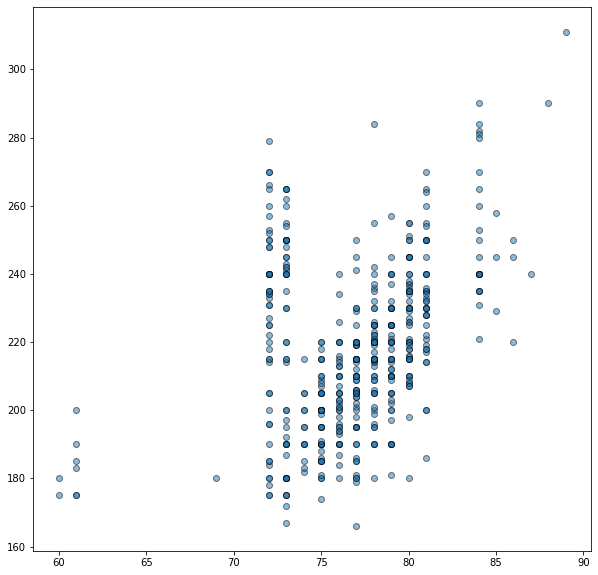

In [41]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(kmeans_data['height_in_inches'], kmeans_data['Wt'], alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 100)
plt.ylim(0, 400)
plt.show()

[]
['C', 'SG', 'PF', 'SF', 'PG', 'G', 'F', 'F-G', 'G-F', 'F-C']


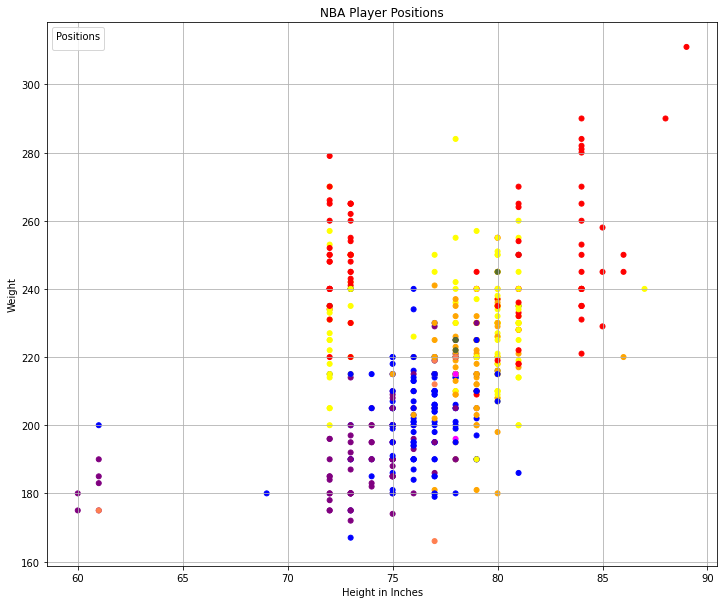

In [70]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='C':
            cols.append('red')
        elif l=='SG':
            cols.append('blue')
        elif l=='PF':
            cols.append('yellow')
        elif l=='SF':
            cols.append('orange')
        elif l=='PG':
            cols.append('purple')  
        elif l=='G':
            cols.append('coral')
        elif l=='F':
            cols.append('darkolivegreen')
        elif l=='F-G':
            cols.append('pink')
        elif l=='G-F':
            cols.append('magenta')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(nba_player_data['Pos'])

fig = plt.figure(figsize=(12,10))
plt.xlabel("Height in Inches")
plt.ylabel("Weight")
plt.title("NBA Player Positions")
scatter = plt.scatter(x=nba_player_data['height_in_inches'],y=nba_player_data['Wt'],s=25,c=cols)
handles, labels = scatter.legend_elements(prop='colors')
labels = ['C', 'SG', 'PF', 'SF', 'PG', 'G', 'F', 'F-G', 'G-F', 'F-C']
plt.legend(handles, labels, title="Positions")
plt.grid(True)
plt.show()

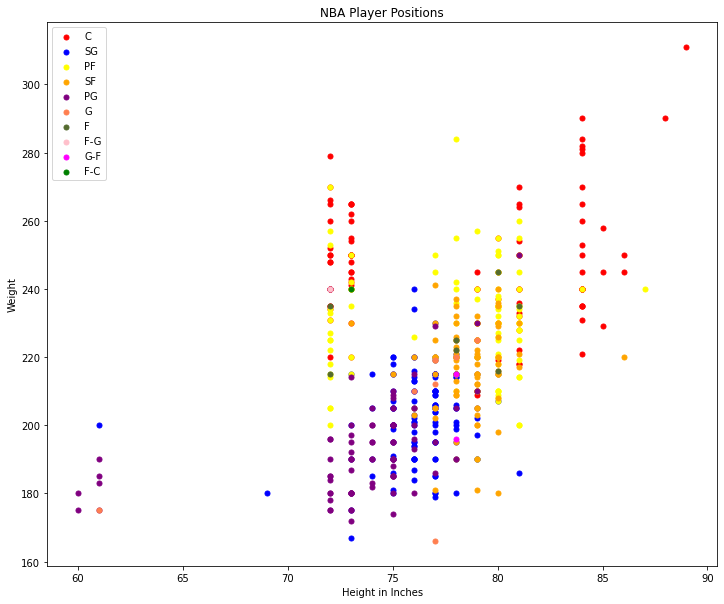

In [76]:
C_height_weight = nba_player_data.loc[nba_player_data['Pos'] == "C"]
SG_height_weight = nba_player_data.loc[nba_player_data['Pos'] == "SG"]
PF_height_weight = nba_player_data.loc[nba_player_data['Pos'] == "PF"]
SF_height_weight = nba_player_data.loc[nba_player_data['Pos'] == "SF"]
PG_height_weight = nba_player_data.loc[nba_player_data['Pos'] == "PG"]
G_height_weight = nba_player_data.loc[nba_player_data['Pos'] == "G"]
F_height_weight = nba_player_data.loc[nba_player_data['Pos'] == "F"]
F_G_height_weight = nba_player_data.loc[nba_player_data['Pos'] == "F-G"]
G_F_height_weight = nba_player_data.loc[nba_player_data['Pos'] == "G-F"]
F_C_height_weight = nba_player_data.loc[nba_player_data['Pos'] == "F-C"]
fig = plt.figure(figsize=(12,10))
plt.xlabel("Height in Inches")
plt.ylabel("Weight")
plt.title("NBA Player Positions")
plt.scatter(C_height_weight['height_in_inches'], C_height_weight['Wt'], label='C', s=25, c='red')
plt.scatter(SG_height_weight['height_in_inches'], SG_height_weight['Wt'], label='SG', s=25, c='blue')
plt.scatter(PF_height_weight['height_in_inches'], PF_height_weight['Wt'], label='PF', s=25, c='yellow')
plt.scatter(SF_height_weight['height_in_inches'], SF_height_weight['Wt'], label='SF', s=25, c='orange')
plt.scatter(PG_height_weight['height_in_inches'], PG_height_weight['Wt'], label='PG', s=25, c='purple')
plt.scatter(G_height_weight['height_in_inches'], G_height_weight['Wt'], label='G', s=25, c='coral')
plt.scatter(F_height_weight['height_in_inches'], F_height_weight['Wt'], label='F', s=25, c='darkolivegreen')
plt.scatter(F_G_height_weight['height_in_inches'], F_G_height_weight['Wt'], label='F-G', s=25, c='pink')
plt.scatter(G_F_height_weight['height_in_inches'], G_F_height_weight['Wt'], label='G-F', s=25, c='magenta')
plt.scatter(F_C_height_weight['height_in_inches'], F_C_height_weight['Wt'], label='F-C', s=25, c='green')
plt.legend(loc='upper left')
plt.show()